# Multi-Dimensional Linear Regression 
# Analysis

The [dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) used for this excercise in Multi-Dimensional Linear Regression is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Theoretical background 

- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
- [Linear Regression Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
- [immoverkauf24: „Lage, Lage, Lage – alte Immobilienweisheit“](https://www.immoverkauf24.de/immobilienverkauf/immobilienverkauf-a-z/lage-lage-lage/)
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy, scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import itertools

import seaborn as sns
sns.set()

## Import data subsets 

In [2]:
data_train = pd.read_csv("data/data_train.csv", na_values='') 
data_test = pd.read_csv("data/data_test.csv", na_values='') 

In [3]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,123700.0,0.0,1.0,0.0,0.0,0.0
1,-122.05,37.36,29.0,1733.0,255.0,679.0,278.0,7.5337,406800.0,0.0,1.0,0.0,0.0,0.0
2,-118.42,34.19,33.0,3353.0,790.0,2318.0,775.0,2.2589,269700.0,0.0,1.0,0.0,0.0,0.0
3,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,109500.0,1.0,0.0,0.0,0.0,0.0
4,-116.95,32.81,31.0,1277.0,293.0,698.0,237.0,3.1106,147700.0,0.0,1.0,0.0,0.0,0.0


--- 

## Multiple Linear Regression 

I attempt to deliberately select variables in order to optimize the multi-dimensional linear regression. 

### 1. First attempt

In a first step I will do a multiple linear regression for the target variable ```median_house_value``` including the following variables: ```longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income```. 

In [4]:
""" --------------------------------------------------------------------
define variables by selecting columns with iloc, see 

URL: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/
     pandas.DataFrame.iloc.html
-------------------------------------------------------------------- """

# define variables 
X_train = data_train.iloc[:,0:8]
y_train = pd.DataFrame(data_train.iloc[:,8])
X_test = data_test.iloc[:,0:8]
y_test = pd.DataFrame(data_test.iloc[:,8])

In [5]:
# create linear regression object 
lm = linear_model.LinearRegression()

# fit linear model to training subset 
model = lm.fit(X_train, y_train)

# make a prediction using the test subset
y_prediction = lm.predict(X_test)

In [6]:
# return the R² score, the Mean Squared Error, the coefficients and the estimated intercept 

# R² score 
print("R² score : %.4f / 1.0000"
    % r2_score(y_test, y_prediction))

# Mean Squared Error 
print("Mean Squared Error: %.2f (smaller is better!)"
    % mean_squared_error(y_test, y_prediction))

# coefficients for the predictors
# print("Coefficients: %.4f"
#      % lm.coef_)
# This produces TypeError: only size-1 arrays can be converted to Python scalars

# predicted intercept at x=0 
print("Intercept : %.10f"
    % lm.intercept_)

R² score : 0.5963 / 1.0000
Mean Squared Error: 3795395562.03 (smaller is better!)
Intercept : -3155985.7409410370


### 2. Second attempt

In a second step I will remove following variables: ```longitude, latitude, population, households, median_income```. 

I do a multiple linear regression for the target variable ```median_house_value``` including the following variables: ```housing_median_age, total_rooms, total_bedrooms```. 

In [7]:
""" --------------------------------------------------------------------
define variables by selecting columns with iloc, see 

URL: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/
     pandas.DataFrame.iloc.html
-------------------------------------------------------------------- """

# define variables 
X_train = data_train.iloc[:,2:5]
y_train = data_train.iloc[:,8]
X_test = data_test.iloc[:,2:5]
y_test = data_test.iloc[:,8]

In [8]:
# create linear regression object 
lm = linear_model.LinearRegression()

# fit linear model to training subset 
model = lm.fit(X_train, y_train)

# make a prediction using the test subset
y_prediction = lm.predict(X_test)

In [9]:
# return the R² score, the Mean Squared Error, the coefficients and the estimated intercept 

# R² score 
print("R² score : %.4f / 1.0000"
    % r2_score(y_test, y_prediction))

# Mean Squared Error 
print("Mean Squared Error: %.2f (smaller is better!)"
    % mean_squared_error(y_test, y_prediction))

# coefficients for the predictors
# print("Coefficients: %.4f"
#      % lm.coef_)
# This produces TypeError: only size-1 arrays can be converted to Python scalars

# predicted intercept at x=0 
print("Intercept : %.10f"
    % lm.intercept_)

R² score : 0.0513 / 1.0000
Mean Squared Error: 8919366356.67 (smaller is better!)
Intercept : 154095.3232664964


### 3. Third attempt

In a third step I will only use the highest correlating variable ```median_income``` and two (out of three) derived features (```rooms_per_household``` and ```population_per_household```) to do a multiple linear regression for the target variable ```median_house_value```. This procedure is based on 
[sonarsushant's work](https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb).

In [10]:
data_train['rooms_per_household']=data_train['total_rooms']/data_train['households']
data_train['bedrooms_per_room']=data_train['total_bedrooms']/data_train['total_rooms']
data_train['population_per_household']=data_train['population']/data_train['households']

In [11]:
data_test['rooms_per_household']=data_test['total_rooms']/data_test['households']
data_test['bedrooms_per_room']=data_test['total_bedrooms']/data_test['total_rooms']
data_test['population_per_household']=data_test['population']/data_test['households']

In [12]:
""" --------------------------------------------------------------------
define variables by aggregating columns to a series 
-------------------------------------------------------------------- """

# define variables 
X_train_series = data_train['median_income'], data_train['rooms_per_household'], \
                 data_train['population_per_household'] # independent variables
X_train = pd.concat(X_train_series, axis=1)
y_train = data_train['median_house_value'] # dependent variable

X_test_series = data_test['median_income'], data_test['rooms_per_household'], \
                 data_test['population_per_household'] # independent variables
X_test = pd.concat(X_test_series, axis=1)
y_test = data_test['median_house_value']

In [13]:
# create linear regression object 
lm = linear_model.LinearRegression()

# fit linear model to training subset 
model = lm.fit(X_train, y_train)

# make a prediction using the test subset
y_prediction = lm.predict(X_test)

In [14]:
# return the R² score, the Mean Squared Error, the coefficients and the estimated intercept 

# R² score 
print("R² score : %.4f / 1.0000"
    % r2_score(y_test, y_prediction))

# Mean Squared Error 
print("Mean Squared Error: %.2f (smaller is better!)"
    % mean_squared_error(y_test, y_prediction))

# coefficients for the predictors
# print("Coefficients: %.4f"
#      % lm.coef_)
# This produces TypeError: only size-1 arrays can be converted to Python scalars

# predicted intercept at x=0 
print("Intercept : %.10f"
    % lm.intercept_)

R² score : 0.4337 / 1.0000
Mean Squared Error: 5324521151.15 (smaller is better!)
Intercept : 55879.9488204201


--- 
## Brute-force: Multiple Linear Regression on *all combinations* of variables 

In [15]:
# create linear regression object 
lm = linear_model.LinearRegression()

In [16]:
# open an empty dictionary for the results of the calculation 
results = {}

In [17]:
""" --------------------------------------------------------------------
calc_r2_score fits a linear model to a training subset, 
makes a prediction for the test subset, 
and returns the R² score (quality of prediction index)
-------------------------------------------------------------------- """

def calc_r2_score(item): 
    # define variables 
    X_train = data_train.loc[:,features] 
    y_train = data_train.loc[:,target]
    X_test = data_test.loc[:,features] 
    y_test = data_test.loc[:,target]
    
    # fit linear model to training subset 
    model = lm.fit(X_train, y_train)
    
    # make a prediction using the test subset
    y_prediction = lm.predict(X_test)
    
    # return the R² score 
    return r2_score(y_test, y_prediction)

""" --------------------------------------------------------------------
calc_MSE returns the Mean Squared Error 
-------------------------------------------------------------------- """

def calc_MSE(item):
    return mean_squared_error(y_test, y_prediction)


In [18]:
""" --------------------------------------------------------------------
define independent variables and target variable
-------------------------------------------------------------------- """

features = ["longitude", "latitude", "housing_median_age", \
            "total_rooms", "total_bedrooms", "population", \
            "households", "median_income"]
target = ["median_house_value"]

combinations = []

for i in range(2, len(features)+1):
   combinations += itertools.combinations(features, i)

In [19]:
len(combinations)

247

    """ --------------------------------------------------------------------
                                   T O   D O
    
    write items in list as keys to the up-to-now empty dictionary 
    then run for-loop and write results as values back to dictionary 
    -------------------------------------------------------------------- """

In [20]:
for index, features in enumerate(combinations):
    print(calc_r2_score(combinations[index]), index, features, len(combinations[index]))

0.2675142853655378 0 ('longitude', 'latitude') 2
0.0003843241902227179 1 ('longitude', 'housing_median_age') 2
0.012681064320332558 2 ('longitude', 'total_rooms') 2
0.0015548891235491746 3 ('longitude', 'total_bedrooms') 2
-0.0019176421500162188 4 ('longitude', 'population') 2
0.0033391001705973533 5 ('longitude', 'households') 2
0.4217275353052885 6 ('longitude', 'median_income') 2
0.024041004141290845 7 ('latitude', 'housing_median_age') 2
0.03591988375463495 8 ('latitude', 'total_rooms') 2
0.024826375354610186 9 ('latitude', 'total_bedrooms') 2
0.023390474203204614 10 ('latitude', 'population') 2
0.026316437102783752 11 ('latitude', 'households') 2
0.43551855127062544 12 ('latitude', 'median_income') 2
0.01957702593064614 13 ('housing_median_age', 'total_rooms') 2
0.0034292467395503623 14 ('housing_median_age', 'total_bedrooms') 2
-0.002084852881989674 15 ('housing_median_age', 'population') 2
0.005779036939385862 16 ('housing_median_age', 'households') 2
0.45025530763703014 17 ('ho

0.47108610280298535 131 ('latitude', 'total_rooms', 'total_bedrooms', 'median_income') 4
0.08482840230511113 132 ('latitude', 'total_rooms', 'population', 'households') 4
0.43682873567128533 133 ('latitude', 'total_rooms', 'population', 'median_income') 4
0.4609863058084863 134 ('latitude', 'total_rooms', 'households', 'median_income') 4
0.06790005598895577 135 ('latitude', 'total_bedrooms', 'population', 'households') 4
0.4536202629622532 136 ('latitude', 'total_bedrooms', 'population', 'median_income') 4
0.4369148245447997 137 ('latitude', 'total_bedrooms', 'households', 'median_income') 4
0.4579010147907093 138 ('latitude', 'population', 'households', 'median_income') 4
0.07576663603934175 139 ('housing_median_age', 'total_rooms', 'total_bedrooms', 'population') 4
0.056193024155354765 140 ('housing_median_age', 'total_rooms', 'total_bedrooms', 'households') 4
0.4951852141971329 141 ('housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income') 4
0.06351038263994047 142 ('h

0.5707988113275912 215 ('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'households', 'median_income') 6
0.29414784449745934 216 ('longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households') 6
0.5929741513450231 217 ('longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'median_income') 6
0.5764686745575538 218 ('longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'households', 'median_income') 6
0.5875687507677667 219 ('longitude', 'latitude', 'housing_median_age', 'population', 'households', 'median_income') 6
0.36455294352211487 220 ('longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households') 6
0.5892937288822131 221 ('longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'median_income') 6
0.5778989242344414 222 ('longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'households', 'median_income') 6
0.5804405986667069 223 ('longitude', 'latitude', 'total_

In [21]:
results_df = pd.read_csv("data/results_1.csv", sep=",") 

In [22]:
results_df.head()

,r2_score,index,features,no_of_features
0,0.598198,239,longitude+latitude+housing_median_age+total_ro...,7
1,0.596301,246,longitude+latitude+housing_median_age+total_ro...,8
2,0.592974,217,longitude+latitude+housing_median_age+total_be...,6
3,0.591154,242,longitude+latitude+housing_median_age+total_be...,7
4,0.589294,221,longitude+latitude+total_rooms+total_bedrooms+...,6


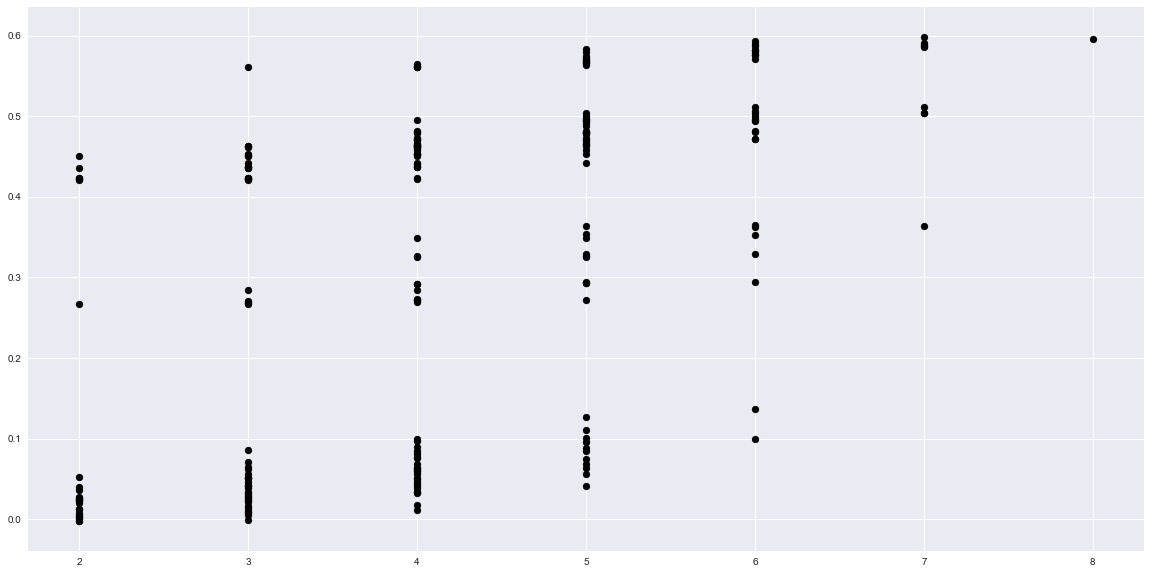

In [23]:
# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(results_df["no_of_features"], results_df["r2_score"], color='black')

plt.show();